# Creating a smaller version of the full ML-32m Dataset.

The code for this notebook did run on a **Google Colab** Environment with 84 Gb RAM. It is not possible to compute the smaller dataset without at least 64 Gb RAM available to the Python process only.

## Statistical analysis of the large dataset

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Set new working directory to a specific folder in Google Drive
google_drive_folder = "/content/drive/My Drive/Colab Notebooks/recommendation-net"  # Replace with your folder name
os.chdir(google_drive_folder)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/Colab Notebooks/recommendation-net


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_movie_dataset(
        dataset_path, 
        movies_enriched_file='movies_enriched.csv', 
        ratings_file='ratings.csv', 
        users_enriched_file='users_enriched.csv', 
        tags_file='tags.csv'):
    """
    Analyze a movie recommendation dataset and provide a detailed overview.

    Parameters:
    - dataset_path (str): Path to the folder containing `ratings.csv`, `movies_enriched.csv`,
                          `tags.csv`, and `users_enriched.csv`.
    """
    # -------------------------------------------------------------------------
    # 1. LOAD THE DATA
    # -------------------------------------------------------------------------
    ratings = pd.read_csv(f"{dataset_path}/{ratings_file}")
    movies = pd.read_csv(f"{dataset_path}/{movies_enriched_file}")
    tags = pd.read_csv(f"{dataset_path}/{tags_file}")
    users = pd.read_csv(f"{dataset_path}/{users_enriched_file}")

    print("Data loaded successfully.")

    # -------------------------------------------------------------------------
    # 2. BASIC INFO ABOUT THE DATA
    # -------------------------------------------------------------------------
    num_unique_users = ratings['userId'].nunique()
    num_unique_movies = ratings['movieId'].nunique()

    print(f"Number of unique users (in ratings.csv): {num_unique_users}")
    print(f"Number of unique movies (in ratings.csv): {num_unique_movies}")

    # -------------------------------------------------------------------------
    # 3. USER ACTIVITY: HOW MANY USERS HAVE RATED AT LEAST 1, 10, 100 MOVIES
    # -------------------------------------------------------------------------
    rating_counts = ratings.groupby('userId').size()
    users_at_least_1 = (rating_counts >= 1).sum()
    users_at_least_10 = (rating_counts >= 10).sum()
    users_at_least_100 = (rating_counts >= 100).sum()

    print(f"Users who have rated at least 1 movie: {users_at_least_1}")
    print(f"Users who have rated at least 10 movies: {users_at_least_10}")
    print(f"Users who have rated at least 100 movies: {users_at_least_100}")

    # -------------------------------------------------------------------------
    # 4. MOVIES AND USERS WITHOUT RATINGS
    # -------------------------------------------------------------------------
    all_movies = set(movies['movieId'].unique())
    rated_movies = set(ratings['movieId'].unique())
    movies_without_ratings = all_movies - rated_movies

    print(f"Number of movies without ratings: {len(movies_without_ratings)}")

    all_users = set(users['userId'].unique())
    users_with_ratings = set(ratings['userId'].unique())
    users_without_ratings = all_users - users_with_ratings

    print(f"Number of users without ratings: {len(users_without_ratings)}")

    # -------------------------------------------------------------------------
    # 5. DISTRIBUTION DIAGRAMS
    # -------------------------------------------------------------------------
    # 5.1 Distribution of rating values
    plt.figure(figsize=(6, 4))
    sns.histplot(ratings['rating'], bins=10, kde=True)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

    # 5.2 Distribution of number of ratings per user
    plt.figure(figsize=(6, 4))
    sns.histplot(rating_counts, bins=30, kde=True)
    plt.title('Distribution of Rating Counts per User')
    plt.xlabel('Number of Ratings by User')
    plt.ylabel('Count of Users')
    plt.show()

    # 5.3 Distribution of number of ratings per movie
    movie_rating_counts = ratings.groupby('movieId').size()
    plt.figure(figsize=(6, 4))
    sns.histplot(movie_rating_counts, bins=30, kde=True)
    plt.title('Distribution of Rating Counts per Movie')
    plt.xlabel('Number of Ratings by Movie')
    plt.ylabel('Count of Movies')
    plt.show()

    # -------------------------------------------------------------------------
    # 6. AVERAGE MOVIE RATINGS
    # -------------------------------------------------------------------------
    global_average_rating = ratings['rating'].mean()
    print(f"Global average rating across all ratings: {global_average_rating:.2f}")

    # Distribution of average ratings per movie
    movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()

    plt.figure(figsize=(6, 4))
    sns.histplot(movie_avg_ratings, bins=30, kde=True)
    plt.title('Distribution of Average Ratings per Movie')
    plt.xlabel('Average Rating')
    plt.ylabel('Count of Movies')
    plt.show()

    # -------------------------------------------------------------------------
    # 7. GENRE ANALYSIS
    # -------------------------------------------------------------------------
    movies['genres'] = movies['genres'].fillna('Unknown')
    movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else ['Unknown'])
    movies_exploded = movies.explode('genres_list')
    genre_counts = movies_exploded['genres_list'].value_counts()

    print("Genre counts (most frequent to least frequent):")
    print(genre_counts)

    plt.figure(figsize=(8, 6))
    genre_counts.plot(kind='bar')
    plt.title('Genre Frequency')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # -------------------------------------------------------------------------
    # 8. CORRELATION ANALYSIS OF MOVIE FEATURES
    # -------------------------------------------------------------------------
    numeric_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
    numeric_cols = [col for col in numeric_cols if col in movies.columns]

    if numeric_cols:
        corr_data = movies[numeric_cols].corr()
        plt.figure(figsize=(6, 4))
        sns.heatmap(corr_data, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap of Movie Features')
        plt.show()
    else:
        print("No numeric columns found for correlation analysis.")

    # -------------------------------------------------------------------------
    # 9. SUMMARY
    # -------------------------------------------------------------------------
    print("Analysis complete. You now have a broad overview of the dataset.")


Data loaded successfully.
Number of unique users (in ratings.csv): 200948
Number of unique movies (in ratings.csv): 84432
Users who have rated at least 1 movie: 200948
Users who have rated at least 10 movies: 200948
Users who have rated at least 100 movies: 80675
Number of movies without ratings: 3153
Number of users without ratings: 0


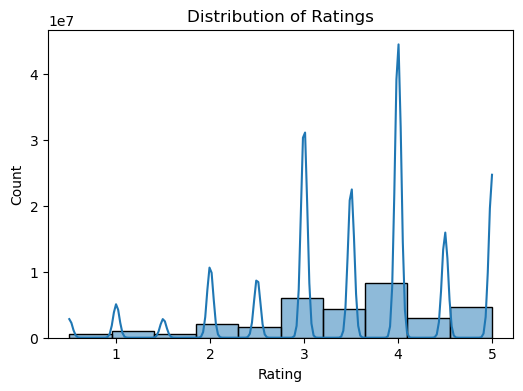

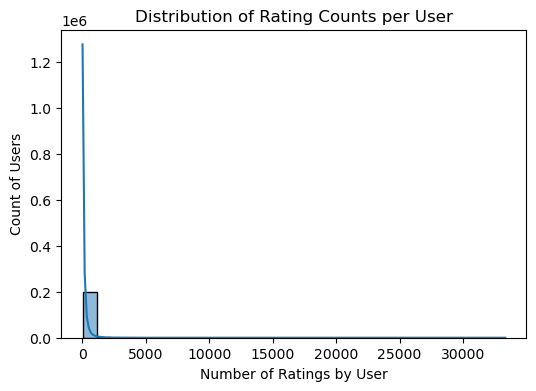

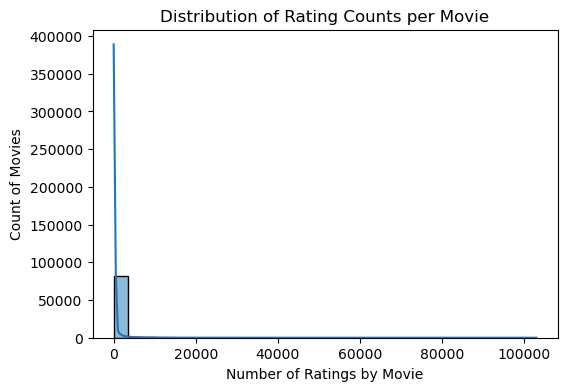

Global average rating across all ratings: 3.54


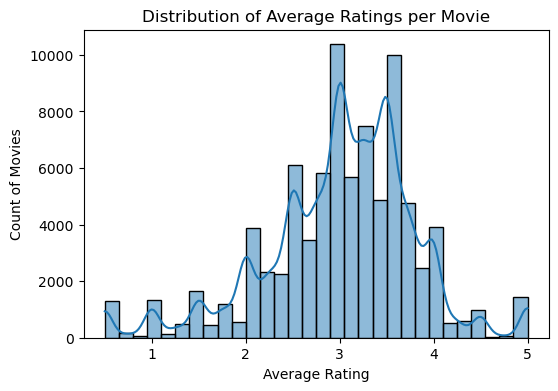

Genre counts (most frequent to least frequent):
genres_list
Drama                 34175
Comedy                23124
Thriller              11823
Romance               10369
Action                 9668
Documentary            9363
Horror                 8654
(no genres listed)     7080
Crime                  6976
Adventure              5402
Sci-Fi                 4907
Animation              4617
Children               4520
Mystery                4013
Fantasy                3851
War                    2325
Western                1696
Musical                1059
Film-Noir               353
IMAX                    195
Name: count, dtype: int64


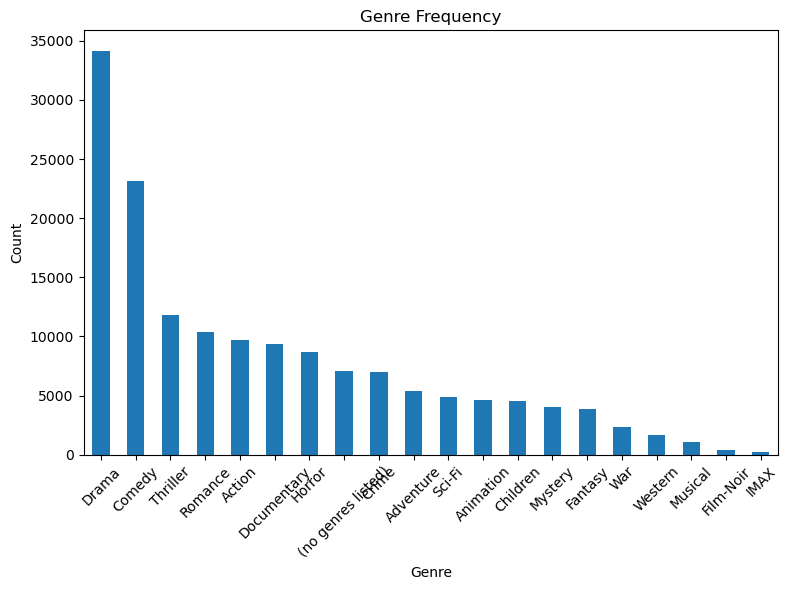

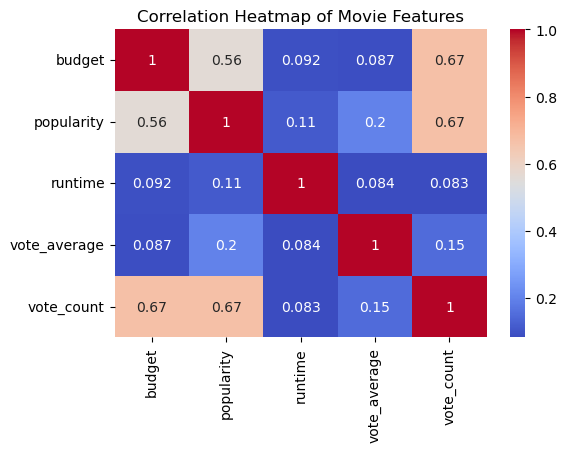

Analysis complete. You now have a broad overview of the dataset.


In [11]:
analyze_movie_dataset("data/ml-32m")

## Creating a smaller dataset with an iterative approach
**Attention:** Does need a lot of RAM to compute the required data structures like historgrams for caching.

## v2

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import random
from tqdm.notebook import tqdm

# =============================================================================
# 1. DATA LOADING
# =============================================================================
def load_data():
    """
    Loads CSVs. Adjust paths as needed or pass them as parameters.
    """
    ratings = pd.read_csv("data/ml-32m/ratings.csv")
    movies = pd.read_csv("data/ml-32m/movies_enriched.csv")
    tags = pd.read_csv("data/ml-32m/tags.csv")
    users = pd.read_csv("data/ml-32m/users_enriched.csv")
    return ratings, movies, tags, users

# =============================================================================
# 2. PREPARE TARGET DISTRIBUTIONS
# =============================================================================
def prepare_target_distributions(ratings, movies):
    """
    Returns three global probability distributions:
      1) user rating count distribution
      2) rating value distribution
      3) genre coverage distribution
    """
    # -- 2.1. user rating count distribution
    rating_counts = ratings.groupby('userId').size()
    user_count_hist = rating_counts.value_counts().sort_index()
    p_rating_count_full = user_count_hist / user_count_hist.sum()  # Series

    # -- 2.2. rating value distribution
    rating_value_counts = ratings['rating'].value_counts().sort_index()
    p_rating_value_full = rating_value_counts / rating_value_counts.sum()  # Series

    # -- 2.3. genre coverage distribution
    movies['genres'] = movies['genres'].fillna('Unknown')
    movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|'))
    merged = pd.merge(ratings, movies, on='movieId', how='inner')
    exploded = merged.explode('genres_list')
    genre_counts_full = exploded['genres_list'].value_counts().sort_index()
    p_genre_full = genre_counts_full / genre_counts_full.sum()  # Series

    return p_rating_count_full, p_rating_value_full, p_genre_full

# =============================================================================
# 3. PREPARE PER-USER HISTOGRAMS (PARTIAL CACHING)
# =============================================================================
def prepare_user_histograms(ratings, movies):
    """
    For each user, precompute:
      - user_count_bin_dict[userId]: number of ratings userId has
      - user_rating_val_dict[userId]: histogram of rating values
      - user_genre_dict[userId]: histogram of genres
    Plus the list of unique rating values and genres.
    """
    # (A) user_count_bin_dict
    user_rating_counts = ratings.groupby('userId').size()

    # (B) rating_value hist precomputation
    all_rating_values = sorted(ratings['rating'].unique())

    # (C) genre hist precomputation
    movies['genres'] = movies['genres'].fillna('Unknown')
    movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|'))
    merged = pd.merge(ratings, movies, on='movieId', how='inner')

    user_count_bin_dict = {}
    user_rating_val_dict = {}
    user_genre_dict = {}

    # gather all genres
    all_genres_set = set()
    for g_list in movies['genres_list']:
        all_genres_set.update(g_list)
    all_genres = sorted(list(all_genres_set))

    rating_val_index_map = {val: idx for idx, val in enumerate(all_rating_values)}
    genre_index_map = {g: idx for idx, g in enumerate(all_genres)}

    grouped = merged.groupby('userId')

    # Build partial histograms for each user
    for user_id, group_df in grouped:
        num_ratings_for_user = len(group_df)
        user_count_bin_dict[user_id] = num_ratings_for_user

        # rating values
        hist_vals = np.zeros(len(all_rating_values), dtype=float)
        for r in group_df['rating']:
            hist_vals[rating_val_index_map[r]] += 1
        user_rating_val_dict[user_id] = hist_vals

        # genres
        exploded_user = group_df.explode('genres_list')
        hist_gen = np.zeros(len(all_genres), dtype=float)
        for g in exploded_user['genres_list']:
            hist_gen[genre_index_map[g]] += 1
        user_genre_dict[user_id] = hist_gen

    # For users with 0 ratings
    all_user_ids = ratings['userId'].unique()
    for uid in all_user_ids:
        if uid not in user_count_bin_dict:
            user_count_bin_dict[uid] = 0
            user_rating_val_dict[uid] = np.zeros(len(all_rating_values), dtype=float)
            user_genre_dict[uid] = np.zeros(len(all_genres), dtype=float)

    return (user_count_bin_dict, user_rating_val_dict, user_genre_dict,
            all_rating_values, all_genres)

# =============================================================================
# 4. DISTRIBUTION DISTANCE & COST FUNCTION
# =============================================================================
def distribution_distance(p_sub, p_full, method="kl"):
    """
    Compare two discrete distributions p_sub, p_full.
    p_sub, p_full: 1D numpy arrays that sum to ~1.
    method: "kl" => KL divergence, "tv" => total variation distance
    """
    eps = 1e-12
    if method == "kl":
        p_sub = p_sub + eps
        p_full = p_full + eps
        return entropy(p_sub, p_full)
    elif method == "tv":
        return 0.5 * np.sum(np.abs(p_sub - p_full))
    else:
        raise NotImplementedError("Only 'kl' and 'tv' are supported.")

def build_prob_dist_from_count_map(count_map):
    """
    Convert a dict of (#ratings -> how many users) to a normalized array.
    """
    sorted_bins = sorted(count_map.keys())
    if not sorted_bins:
        # no users => empty distribution
        return np.array([])
    max_bin = sorted_bins[-1]
    arr = np.zeros(max_bin+1, dtype=float)
    for k, v in count_map.items():
        arr[k] = v
    total = arr.sum()
    if total > 0:
        arr /= total
    return arr

def compute_cost(sample_count_map, sample_rating_val_arr, sample_genre_arr,
                 p_rating_count_full, p_rating_value_full, p_genre_full,
                 method="kl", alpha=1.0, beta=1.0, gamma=1.0):
    """
    Weighted sum of distribution distances (rating count distribution, rating value distribution, genre distribution).
    """
    # ========== 1) RATING COUNT DISTRIBUTION ==========
    p_sub_count = build_prob_dist_from_count_map(sample_count_map)

    # Global distribution as np array
    p_full_count_arr = p_rating_count_full.values
    # Ensure nonzero sum
    p_full_count_arr = p_full_count_arr / (p_full_count_arr.sum() + 1e-12)

    # Align shapes
    len_sub_count = len(p_sub_count)
    len_full_count = len(p_full_count_arr)

    if len_sub_count < len_full_count:
        # pad p_sub_count with zeros
        p_sub_count = np.concatenate([
            p_sub_count,
            np.zeros(len_full_count - len_sub_count)
        ])
    elif len_sub_count > len_full_count:
        # truncate p_sub_count
        p_sub_count = p_sub_count[:len_full_count]

    # safety normalize again
    p_sub_count_sum = p_sub_count.sum()
    if p_sub_count_sum > 0:
        p_sub_count /= p_sub_count_sum

    dist_counts = distribution_distance(p_sub_count, p_full_count_arr, method=method)

    # ========== 2) RATING VALUE DISTRIBUTION ==========
    sum_val_sub = sample_rating_val_arr.sum()
    if sum_val_sub > 0:
        p_val_sub = sample_rating_val_arr / sum_val_sub
    else:
        p_val_sub = sample_rating_val_arr  # all zeros
    p_val_full = p_rating_value_full.values
    p_val_full /= (p_val_full.sum() + 1e-12)

    if len(p_val_sub) < len(p_val_full):
        p_val_sub = np.concatenate([p_val_sub, np.zeros(len(p_val_full) - len(p_val_sub))])
    elif len(p_val_sub) > len(p_val_full):
        p_val_sub = p_val_sub[:len(p_val_full)]

    dist_val = distribution_distance(p_val_sub, p_val_full, method=method)

    # ========== 3) GENRE DISTRIBUTION ==========
    sum_gen_sub = sample_genre_arr.sum()
    if sum_gen_sub > 0:
        p_gen_sub = sample_genre_arr / sum_gen_sub
    else:
        p_gen_sub = sample_genre_arr
    p_gen_full = p_genre_full.values
    p_gen_full /= (p_gen_full.sum() + 1e-12)

    if len(p_gen_sub) < len(p_gen_full):
        p_gen_sub = np.concatenate([p_gen_sub, np.zeros(len(p_gen_full) - len(p_gen_sub))])
    elif len(p_gen_sub) > len(p_gen_full):
        p_gen_sub = p_gen_sub[:len(p_gen_full)]

    dist_gen = distribution_distance(p_gen_sub, p_gen_full, method=method)

    # Weighted sum
    total_cost = alpha * dist_counts + beta * dist_val + gamma * dist_gen
    return total_cost

# =============================================================================
# 5. DISTRIBUTION MATCHER CLASS (PARTIAL UPDATES)
# =============================================================================
class DistributionMatcher:
    def __init__(self,
                 p_rating_count_full, p_rating_value_full, p_genre_full,
                 user_count_bin_dict, user_rating_val_dict, user_genre_dict,
                 method="kl", alpha=1.0, beta=1.0, gamma=1.0):
        """
        We store references to per-user histograms + global distributions.
        We'll build a partial histogram that represents the current user subset.
        """
        # Full distributions
        self.p_rating_count_full = p_rating_count_full
        self.p_rating_value_full = p_rating_value_full
        self.p_genre_full = p_genre_full

        # Per-user data
        self.user_count_bin_dict = user_count_bin_dict
        self.user_rating_val_dict = user_rating_val_dict
        self.user_genre_dict = user_genre_dict

        # Cost function settings
        self.method = method
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

        # Current subset partials
        self.current_count_map = {}
        self.current_rating_vals = None
        self.current_genres = None
        self.subset_users = set()

    def initialize_subset(self, user_ids):
        """
        Build partial histograms from scratch for the initial subset of users.
        """
        self.subset_users = set(user_ids)
        self.current_count_map = {}

        # figure out some lengths
        if len(self.user_rating_val_dict) > 0:
            # pick an arbitrary user to see the shape of rating_val / genre arrays
            any_user = next(iter(self.user_rating_val_dict.keys()))
            rv_len = len(self.user_rating_val_dict[any_user])
            gn_len = len(self.user_genre_dict[any_user])
        else:
            rv_len = 0
            gn_len = 0

        self.current_rating_vals = np.zeros(rv_len, dtype=float)
        self.current_genres = np.zeros(gn_len, dtype=float)

        for u in self.subset_users:
            x = self.user_count_bin_dict[u]  # number of ratings
            self.current_count_map[x] = self.current_count_map.get(x, 0) + 1
            self.current_rating_vals += self.user_rating_val_dict[u]
            self.current_genres += self.user_genre_dict[u]

    def add_user(self, user_id):
        """Add user to the subset partial histogram."""
        self.subset_users.add(user_id)
        x = self.user_count_bin_dict[user_id]
        self.current_count_map[x] = self.current_count_map.get(x, 0) + 1
        self.current_rating_vals += self.user_rating_val_dict[user_id]
        self.current_genres += self.user_genre_dict[user_id]

    def remove_user(self, user_id):
        """Remove user from the subset partial histogram."""
        self.subset_users.remove(user_id)
        x = self.user_count_bin_dict[user_id]
        old_val = self.current_count_map.get(x, 0)
        if old_val <= 1:
            self.current_count_map.pop(x, None)
        else:
            self.current_count_map[x] = old_val - 1

        self.current_rating_vals -= self.user_rating_val_dict[user_id]
        self.current_genres -= self.user_genre_dict[user_id]

    def compute_current_cost(self):
        """Compute the cost for the subset's distributions vs. the global."""
        return compute_cost(self.current_count_map,
                            self.current_rating_vals,
                            self.current_genres,
                            self.p_rating_count_full,
                            self.p_rating_value_full,
                            self.p_genre_full,
                            method=self.method,
                            alpha=self.alpha,
                            beta=self.beta,
                            gamma=self.gamma)

# =============================================================================
# 6. HILL CLIMBING SEARCH WITH PROGRESS
# =============================================================================
def hill_climbing_search(distribution_matcher,
                         all_users,
                         initial_subset_size=10000,
                         max_iterations=3000,
                         verbose=True,
                         print_interval=500):
    """
    Hill-climbing search with partial updates, using tqdm for progress bar.
    We propose a random "swap" each iteration and accept it if it lowers the cost.
    """
    all_users_list = list(all_users)  # fix set sampling deprecation

    # 1) INITIAL SUBSET
    random_subset_ids = set(random.sample(all_users_list, initial_subset_size))
    distribution_matcher.initialize_subset(random_subset_ids)

    best_cost = distribution_matcher.compute_current_cost()
    current_cost = best_cost
    best_subset = distribution_matcher.subset_users.copy()

    if verbose:
        print(f"[INIT] subset_size={len(best_subset)}, cost={best_cost:.4f}")

    # 2) ITERATIVE SWAPS
    from tqdm.notebook import tqdm  # ensure tqdm is loaded
    for i in tqdm(range(max_iterations), desc="Hill-Climbing", mininterval=1.0):
        out_user = random.choice(list(distribution_matcher.subset_users))
        in_user = random.choice(list(all_users - distribution_matcher.subset_users))

        # remove / add
        distribution_matcher.remove_user(out_user)
        distribution_matcher.add_user(in_user)

        new_cost = distribution_matcher.compute_current_cost()

        if new_cost < current_cost:
            # accept swap
            current_cost = new_cost
            if new_cost < best_cost:
                best_cost = new_cost
                best_subset = distribution_matcher.subset_users.copy()
        else:
            # revert swap
            distribution_matcher.remove_user(in_user)
            distribution_matcher.add_user(out_user)

        # periodic print
        if (i+1) % print_interval == 0 and verbose:
            print(f"Iteration {i+1}, current_cost={current_cost:.4f}, best_cost={best_cost:.4f}")

    return best_subset, best_cost

# =============================================================================
# 7. PREPARATION FUNCTION FOR REUSABILITY
# =============================================================================
def prepare_histogram_data(ratings, movies, users, method="kl", alpha=1.0, beta=1.0, gamma=1.0):
    """
    Creates all the data needed for hill climbing:
      - p_rating_count_full, p_rating_value_full, p_genre_full
      - user_count_bin_dict, user_rating_val_dict, user_genre_dict
      - And returns a DistributionMatcher instance (uninitialized).
    This allows you to reuse the prepared data if hill climbing fails or needs retrying.
    """
    # Target distributions
    p_rating_count_full, p_rating_value_full, p_genre_full = prepare_target_distributions(ratings, movies)

    # Per-user histograms
    (user_count_bin_dict,
     user_rating_val_dict,
     user_genre_dict,
     all_rating_values,
     all_genres) = prepare_user_histograms(ratings, movies)

    # Create distribution matcher (uninitialized)
    matcher = DistributionMatcher(
        p_rating_count_full=p_rating_count_full,
        p_rating_value_full=p_rating_value_full,
        p_genre_full=p_genre_full,
        user_count_bin_dict=user_count_bin_dict,
        user_rating_val_dict=user_rating_val_dict,
        user_genre_dict=user_genre_dict,
        method=method,
        alpha=alpha,
        beta=beta,
        gamma=gamma
    )

    return (matcher, p_rating_count_full, p_rating_value_full, p_genre_full,
            user_count_bin_dict, user_rating_val_dict, user_genre_dict)



In [7]:
# =============================================================================
# 8. MAIN FUNCTION
# =============================================================================

# 8.1 Load data
ratings, movies, tags, users = load_data()

# 8.2 Prepare histogram data (for reusability)
(
    distribution_matcher,
    p_rating_count_full,
    p_rating_value_full,
    p_genre_full,
    user_count_bin_dict,
    user_rating_val_dict,
    user_genre_dict
) = prepare_histogram_data(
    ratings=ratings,
    movies=movies,
    users=users,
    method="kl",
    alpha=1.0,
    beta=1.0,
    gamma=1.0
)

In [13]:
# 8.3 Run hill climbing
all_users = set(users['userId'].unique())
final_subset, final_cost = hill_climbing_search(
    distribution_matcher=distribution_matcher,
    all_users=all_users,
    initial_subset_size=10000,   # for example
    max_iterations=2000,        # tweak as needed
    verbose=True,
    print_interval=500
)

print(f"\n[RESULT] final_best_cost={final_cost:.4f}, subset_size={len(final_subset)}")

# 8.4 Subset the data (movies, ratings, tags, users)
sampled_ratings = ratings[ratings['userId'].isin(final_subset)]
sampled_tags = tags[tags['userId'].isin(final_subset)]
sampled_movie_ids = set(sampled_ratings['movieId'].unique())
sampled_movies = movies[movies['movieId'].isin(sampled_movie_ids)]
sampled_users_df = users[users['userId'].isin(final_subset)]

# 8.5 Save
sampled_ratings.to_csv("data/10k-sampled/ratings.csv", index=False)
sampled_tags.to_csv("data/10k-sampled/tags.csv", index=False)
sampled_movies.to_csv("data/10k-sampled/movies_enriched.csv", index=False)
sampled_users_df.to_csv("data/10k-sampled/users_enriched.csv", index=False)

print("Done. Saved the derived dataset.")

[INIT] subset_size=10000, cost=0.4483


Hill-Climbing:   0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 500, current_cost=0.4375, best_cost=0.4375
Iteration 1000, current_cost=0.4287, best_cost=0.4287
Iteration 1500, current_cost=0.4211, best_cost=0.4211
Iteration 2000, current_cost=0.4132, best_cost=0.4132

[RESULT] final_best_cost=0.4132, subset_size=10000
Done. Saved the derived dataset.


## Analyze the newly derived dataset

Data loaded successfully.
Number of unique users (in ratings.csv): 10000
Number of unique movies (in ratings.csv): 31222
Users who have rated at least 1 movie: 10000
Users who have rated at least 10 movies: 10000
Users who have rated at least 100 movies: 4105
Number of movies without ratings: 0
Number of users without ratings: 0


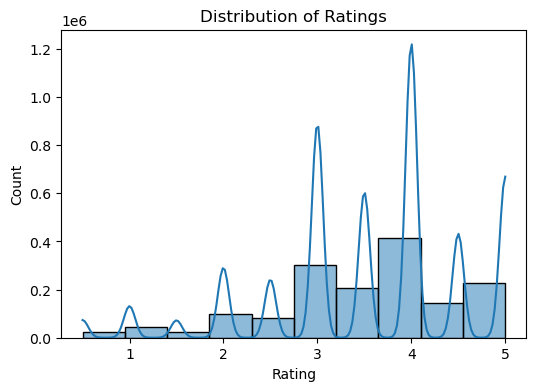

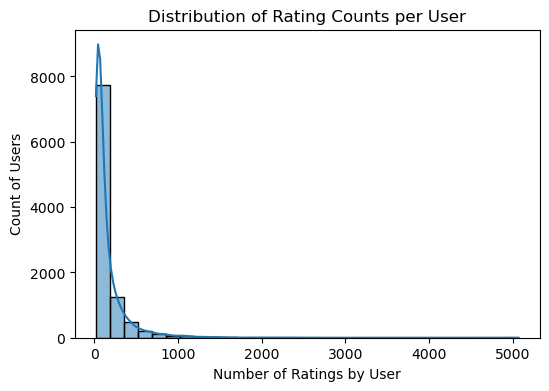

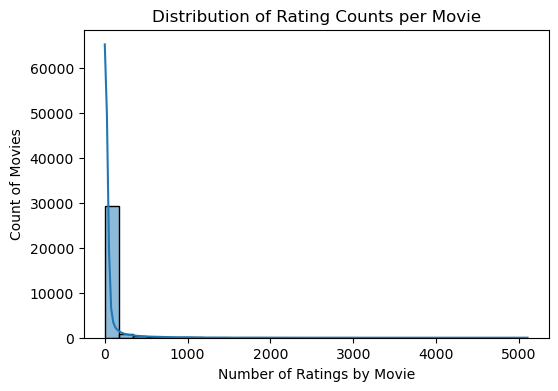

Global average rating across all ratings: 3.55


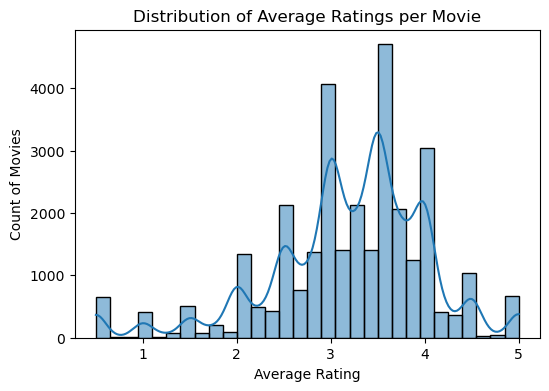

Genre counts (most frequent to least frequent):
genres_list
Drama                 14051
Comedy                 9569
Thriller               5516
Action                 4515
Romance                4247
Crime                  3371
Horror                 3324
Adventure              2699
Sci-Fi                 2318
Documentary            2183
Mystery                1794
Fantasy                1780
Children               1701
Animation              1695
War                    1093
(no genres listed)      869
Musical                 727
Western                 476
Film-Noir               291
IMAX                    186
Name: count, dtype: int64


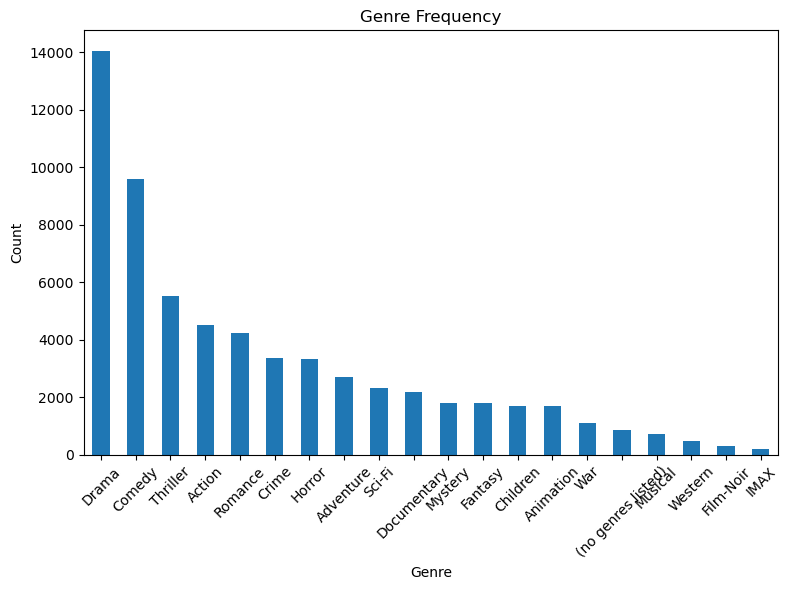

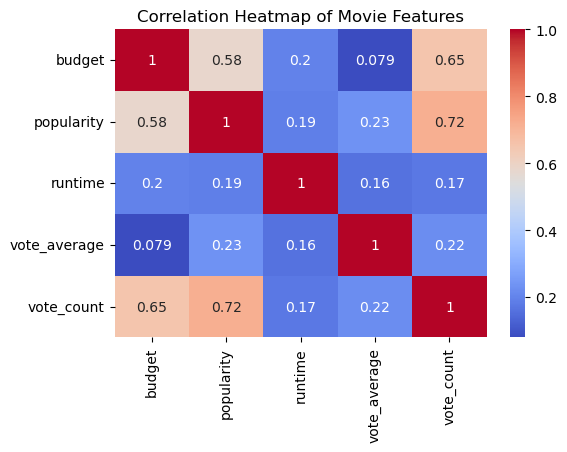

Analysis complete. You now have a broad overview of the dataset.


In [14]:
analyze_movie_dataset("data/10k-sampled", users_enriched_file='users_enriched_tags.csv', movies_enriched_file='movies_enriched_tags.csv')

## Example for the incorrectly derived dataset

Data loaded successfully.
Number of unique users (in ratings.csv): 10000
Number of unique movies (in ratings.csv): 30706
Users who have rated at least 1 movie: 10000
Users who have rated at least 10 movies: 10000
Users who have rated at least 100 movies: 4021
Number of movies without ratings: 0
Number of users without ratings: 0


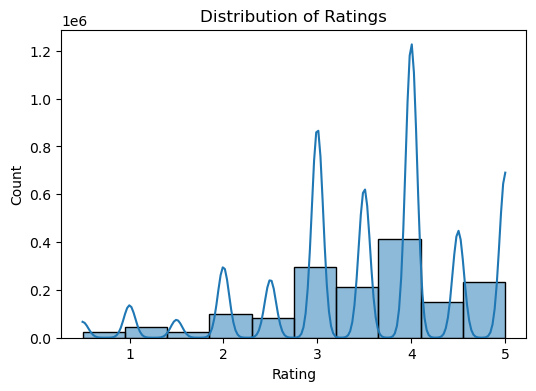

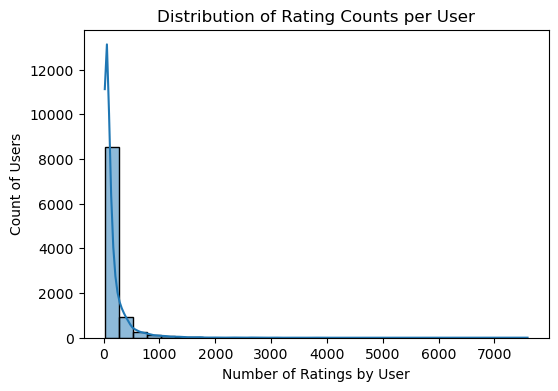

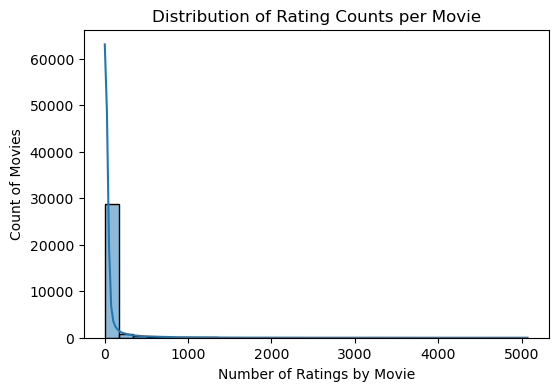

Global average rating across all ratings: 3.56


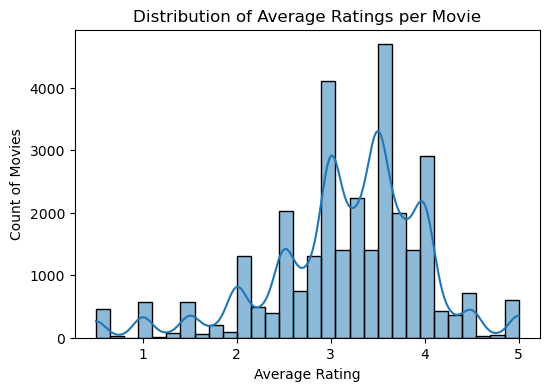

Genre counts (most frequent to least frequent):
genres_list
Drama                 13753
Comedy                 9237
Thriller               4983
Romance                4218
Action                 4171
Horror                 3283
Crime                  3068
Adventure              2617
Documentary            2440
Sci-Fi                 2306
Animation              1966
Fantasy                1820
Children               1743
Mystery                1670
War                    1110
(no genres listed)      893
Musical                 753
Western                 498
Film-Noir               291
IMAX                    184
Name: count, dtype: int64


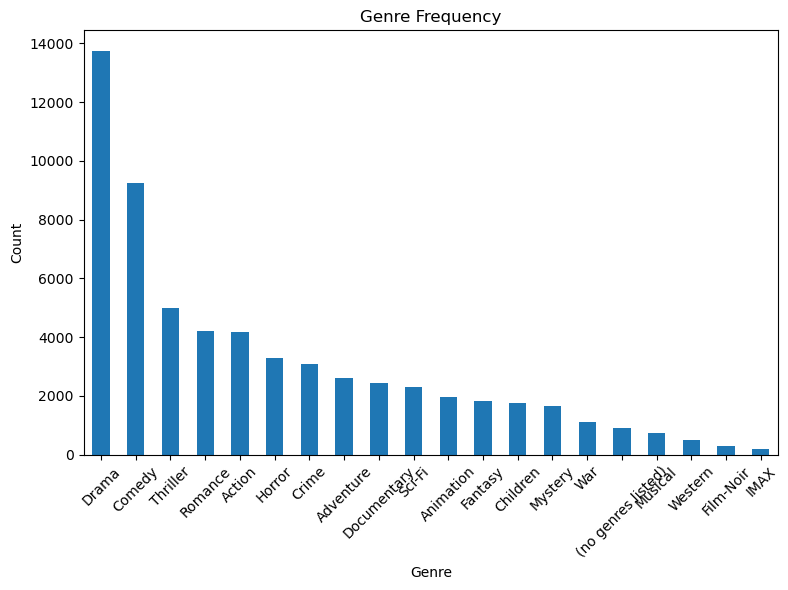

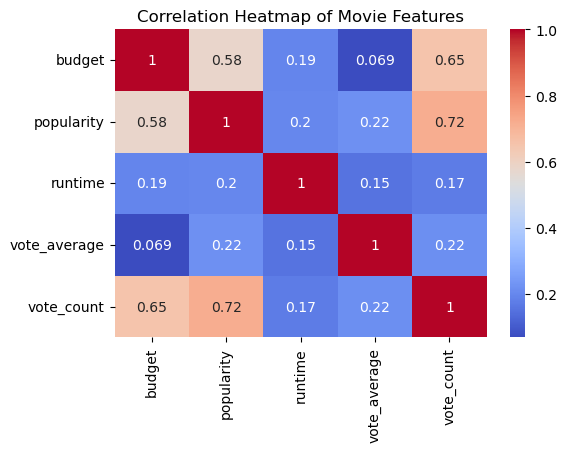

Analysis complete. You now have a broad overview of the dataset.


In [4]:
analyze_movie_dataset("data/ml-10k-users")

## Post-processing of the newly derived dataset

Validate the newly created dataset

In [1]:
import pandas as pd

def validate_users(input_dir):
    """
    Validates if users in ratings.csv match those in users_enriched.csv and tags.csv.

    Args:
        input_dir (str): Directory containing the dataset files (ratings.csv, users_enriched.csv, tags.csv).
    """
    # File paths
    ratings_file = f"{input_dir}/ratings.csv"
    users_enriched_file = f"{input_dir}/users_enriched.csv"
    tags_file = f"{input_dir}/tags.csv"

    # Load datasets
    print("Loading ratings.csv...")
    ratings = pd.read_csv(ratings_file)
    print("Loading users_enriched.csv...")
    users_enriched = pd.read_csv(users_enriched_file)
    print("Loading tags.csv...")
    tags = pd.read_csv(tags_file)

    # Extract unique user IDs from each file
    ratings_users = set(ratings['userId'].unique())
    users_enriched_users = set(users_enriched['userId'].unique())
    tags_users = set(tags['userId'].unique())

    # Validate users
    print("\nValidation Results:")

    # Check if all users in ratings are in users_enriched
    missing_in_users_enriched = ratings_users - users_enriched_users
    if missing_in_users_enriched:
        print(f"Users in ratings.csv but missing in users_enriched.csv: {len(missing_in_users_enriched)}")
        print(f"Example missing users: {list(missing_in_users_enriched)[:10]}")
    else:
        print("All users in ratings.csv are present in users_enriched.csv.")

    # Check if all users in ratings are in tags
    missing_in_tags = ratings_users - tags_users
    if missing_in_tags:
        print(f"Users in ratings.csv but missing in tags.csv: {len(missing_in_tags)}")
        print(f"Example missing users: {list(missing_in_tags)[:10]}")
    else:
        print("All users in ratings.csv are present in tags.csv.")

    # Check for extra users in users_enriched
    extra_in_users_enriched = users_enriched_users - ratings_users
    if extra_in_users_enriched:
        print(f"Extra users in users_enriched.csv not in ratings.csv: {len(extra_in_users_enriched)}")
        print(f"Example extra users: {list(extra_in_users_enriched)[:10]}")
    else:
        print("No extra users in users_enriched.csv.")

    # Check for extra users in tags
    extra_in_tags = tags_users - ratings_users
    if extra_in_tags:
        print(f"Extra users in tags.csv not in ratings.csv: {len(extra_in_tags)}")
        print(f"Example extra users: {list(extra_in_tags)[:10]}")
    else:
        print("No extra users in tags.csv.")

    print("\nValidation Complete.")

# Directory containing the dataset
INPUT_DIR = "data/10k-sampled"  # Replace with the directory of your reduced dataset

# Validate the users
validate_users(INPUT_DIR)


Loading ratings.csv...
Loading users_enriched.csv...
Loading tags.csv...

Validation Results:
All users in ratings.csv are present in users_enriched.csv.
Users in ratings.csv but missing in tags.csv: 9186
Example missing users: [32769, 2, 98307, 163844, 163850, 32780, 131099, 98337, 196643, 98343]
No extra users in users_enriched.csv.
No extra users in tags.csv.

Validation Complete.


In [4]:
import pandas as pd

def remove_column_and_save(file_path, column_to_remove):
    """
    Removes a specified column from a CSV file and saves it with the same name.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    - column_to_remove (str): Name of the column to remove.
    """
    try:
        # Load the CSV file
        df = pd.read_csv(file_path,quotechar='"',         # Standard CSV quote character
            escapechar='\\',       # Standard escape character
            encoding='utf-8')
        print(f"Loaded file: {file_path}. Shape: {df.shape}")
        
        # Check if the column exists
        if column_to_remove in df.columns:
            # Remove the column
            df.drop(columns=[column_to_remove], inplace=True)
            print(f"Removed column: {column_to_remove}. New shape: {df.shape}")
        else:
            print(f"Column '{column_to_remove}' not found in the file. No changes made.")
        
        # Save the updated DataFrame to the same file
        df.to_csv(file_path, index=False,quotechar='"',         # Standard CSV quote character
            escapechar='\\',       # Standard escape character
            encoding='utf-8')
        print(f"Saved updated file: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
file_path = "data/10k-sampled/movies_enriched.csv"  # Replace with your CSV file path
column_to_remove = "genres_list"  # Replace with the column you want to remove

remove_column_and_save(file_path, column_to_remove)


Loaded file: data/10k-sampled/movies_enriched.csv. Shape: (31222, 19)
Removed column: genres_list. New shape: (31222, 18)
Saved updated file: data/10k-sampled/movies_enriched.csv


Now let's integrate the tags in the movies/users enriched files.

In [7]:
import pandas as pd
import os

def integrate_tags(input_dir, output_dir):
    """
    Integrates tags from tags.csv into movies_enriched.csv and users_enriched.csv.

    Args:
        input_dir (str): Directory containing the reduced dataset files.
        output_dir (str): Directory where the updated dataset files will be saved.
    """
    # File paths
    tags_file = os.path.join(input_dir, "tags.csv")
    movies_file = os.path.join(input_dir, "movies_enriched.csv")
    users_file = os.path.join(input_dir, "users_enriched.csv")

    # Load files
    print("Loading tags.csv...")
    tags = pd.read_csv(tags_file, quotechar='"',
            escapechar='\\',
            encoding='utf-8',
            skipinitialspace=True)
    print("Loading movies_enriched.csv...")
    movies = pd.read_csv(movies_file, quotechar='"',
            escapechar='\\',
            encoding='utf-8',
            skipinitialspace=True)
    print("Loading users_enriched.csv...")
    users = pd.read_csv(users_file, quotechar='"',
            escapechar='\\',
            encoding='utf-8',
            skipinitialspace=True)

    # Step 1: Aggregate tags for movies
    print("Aggregating tags by movie...")

    # Ensure all tags are strings and handle NaN values
    tags['tag'] = tags['tag'].fillna("").astype(str)

    tags_by_movie = tags.groupby('movieId')['tag'].apply(
        lambda x: ', '.join(sorted(set(x)))
    ).reset_index()

    tags_by_movie.rename(columns={'tag': 'tags_by_users'}, inplace=True)

    # Merge aggregated tags into movies_enriched.csv
    print("Merging tags into movies_enriched.csv...")
    movies = movies.merge(tags_by_movie, on='movieId', how='left')
    movies['tags_by_users'] = movies['tags_by_users'].fillna('')  # Fill missing tags with empty strings

    # Save the updated movies_enriched.csv
    movies_output_file = os.path.join(output_dir, "movies_enriched_tags.csv")
    movies.to_csv(movies_output_file, index=False, quotechar='"',         # Standard CSV quote character
            escapechar='\\',       # Standard escape character
            encoding='utf-8')
    print(f"Updated movies_enriched.csv saved to {movies_output_file}")

    # Step 2: Aggregate tags for users
    print("Aggregating tags by user...")

    tags_by_user = tags.groupby('userId')['tag'].apply(
        lambda x: ', '.join(sorted(set(x)))
    ).reset_index()

    tags_by_user.rename(columns={'tag': 'tags_user'}, inplace=True)

    # Merge aggregated tags into users_enriched.csv
    print("Merging tags into users_enriched.csv...")
    users = users.merge(tags_by_user, on='userId', how='left')
    users['tags_user'] = users['tags_user'].fillna('')  # Fill missing tags with empty strings

    # Save the updated users_enriched.csv
    users_output_file = os.path.join(output_dir, "users_enriched_tags.csv")
    users.to_csv(users_output_file, index=False, quotechar='"',         # Standard CSV quote character
            escapechar='\\',       # Standard escape character
            encoding='utf-8')
    print(f"Updated users_enriched.csv saved to {users_output_file}")

    print("Tags integration complete.")

# Parameters
INPUT_DIR = "data/10k-sampled"  # Replace with the directory of the reduced dataset
OUTPUT_DIR = "data/10k-sampled"  # Replace with the desired output directory

# Integrate tags
integrate_tags(INPUT_DIR, OUTPUT_DIR)


Loading tags.csv...
Loading movies_enriched.csv...
Loading users_enriched.csv...
Aggregating tags by movie...
Merging tags into movies_enriched.csv...
Updated movies_enriched.csv saved to data/10k-sampled/movies_enriched_tags.csv
Aggregating tags by user...
Merging tags into users_enriched.csv...
Updated users_enriched.csv saved to data/10k-sampled/users_enriched_tags.csv
Tags integration complete.
